# Face tracking pipeline

The following example illustrates how to use the `facenet_pytorch` python package to perform face detection and tracking on an image dataset using MTCNN.

In [45]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw, ImageFilter
from IPython import display
import matplotlib.pyplot as plt

#### Determine if an nvidia GPU is available

In [52]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


#### Define MTCNN module

Note that, since MTCNN is a collection of neural nets and other code, the device must be passed in the following way to enable copying of objects when needed internally.

See `help(MTCNN)` for more details.

In [53]:
mtcnn = MTCNN(keep_all=True, device=device)

#### Get a sample video

We begin by loading a video with some faces in it. The `mmcv` PyPI package by mmlabs is used to read the video frames (it can be installed with `pip install mmcv`). Frames are then converted to PIL images.

In [11]:
video = mmcv.VideoReader('security.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video('security.mp4', width=640)

#### Run video through MTCNN

We iterate through each frame, detect faces, and draw their bounding boxes on the video frames.

In [60]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    detections = mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    if boxes is not None:
        
        for box in boxes:
            
#             print(box)
#             x = box[0]
#             y = box[1]
#             w = box[2] - x
#             h = box[3] - y
#             crop_img = frame_draw.crop((int(box[0]), int(box[1]), int(box[2]), int(box[3])))
#             crop_img = crop_img.save("cropped_face.jpg")
            
#             formatted_img = cv2.imread('cropped_face.jpg')

#             for i, col in enumerate(['b', 'g', 'r']):
#                 hist = cv2.calcHist([formatted_img], [i], None, [256], [0, 256])
#                 plt.plot(hist, color = col)
#                 plt.xlim([0, 256])
            
#             print(hist)
            
#             draw.rectangle(box.tolist(), outline=(255, 0, 0), fill=(255, 0, 0))

#             crop_img = frame_draw.crop((int(box[0]), int(box[1]), int(box[2]), int(box[3])))
#             crop_img.filter(ImageFilter.GaussianBlur(radius = 5))
        
            # Make a mask the same size as the image filled with black
            mask = Image.new('L',frame_draw.size)

            # Draw a filled white circle onto the black mask
            draw = ImageDraw.Draw(mask)
            draw.rectangle(box.tolist(), outline=(255), fill=(255))

            # Blur the entire image
            blurred = frame_draw.filter(ImageFilter.GaussianBlur(radius=15))

            # Composite blurred image over sharp one within mask
            res = Image.composite(blurred, frame_draw, mask)
            
            frame_draw = res
            
    
    # Add to frame list
    frames_tracked.append(frame_draw)
print('\nDone')

Tracking frame: 216
Done


#### Display detections

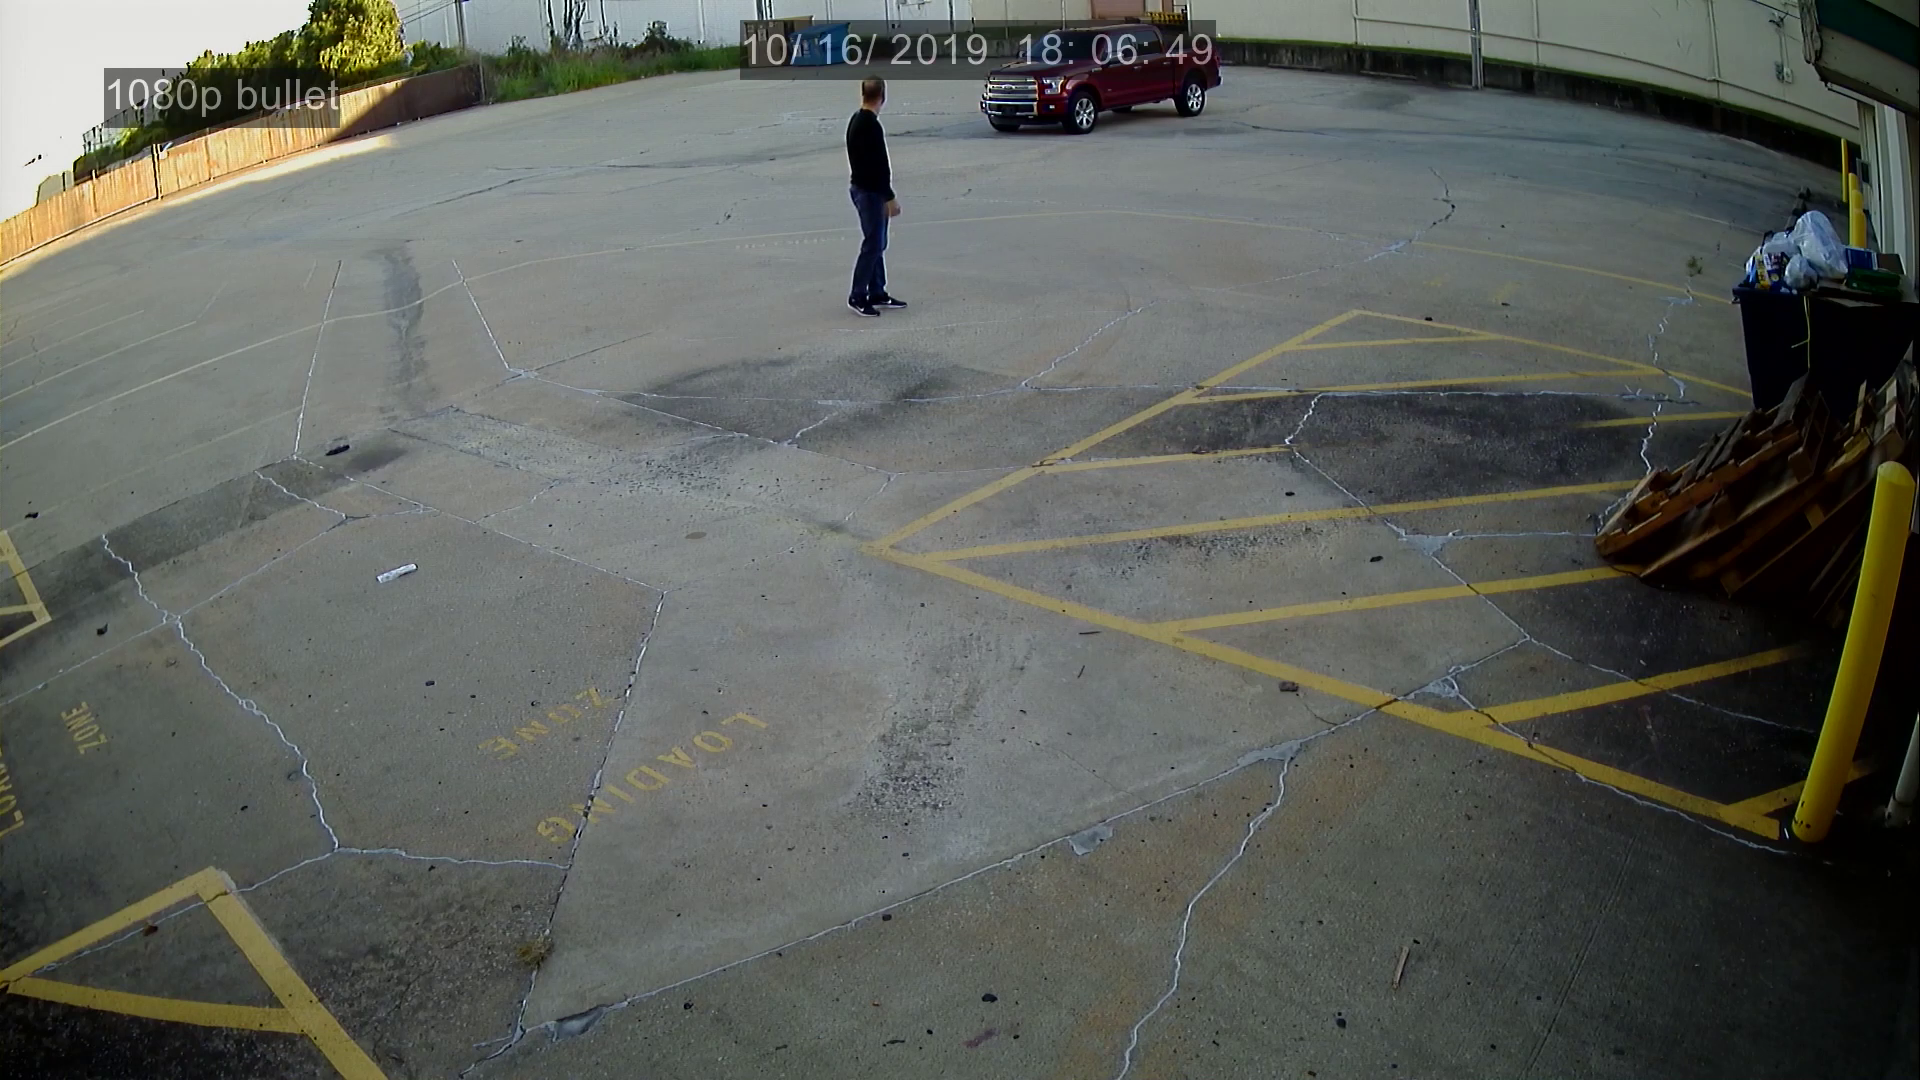

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

#### Save tracked video

In [61]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, video.fps, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()